In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.fingerprinter import Fingerprinter
from utils.visualization import plot_regression_histograms

from sklearn.ensemble import RandomForestRegressor

%load_ext autoreload
%autoreload 2

## Datasets

In [3]:
train = pd.read_csv('../train_clean.csv')
test = pd.read_csv('../test_clean.csv')
properties = train.columns[1:]

In [4]:
fingerprinter = Fingerprinter()

train_X = fingerprinter(train['SMILES'].tolist())
test_X = fingerprinter(test['SMILES'].tolist())

n_features = train_X.shape[1]
print(f'Fingerprints have {n_features} features')

Fingerprints have 2048 features


## Random Forest Models

In [5]:
params = dict(
    min_samples_leaf = 5, 
    n_estimators = 500, 
    max_depth = 12
)

rfr_dict = {property_label : RandomForestRegressor(**params)
            for property_label in properties}

In [6]:
for property_label, rfr in rfr_dict.items():

    print(f'Training RFR for {property_label}...', end='')

    train_Y = train[property_label]
    rfr.fit(train_X, train_Y)
    
    print(f'Done')

Training RFR for Viability Mask 1...Done
Training RFR for Viability Mask 2...Done
Training RFR for LPS Abs...Done
Training RFR for LPS Lum...Done
Training RFR for MPLA Abs...Done
Training RFR for MPLA Lum...Done
Training RFR for CpG Abs...Done
Training RFR for cGAMP Abs...Done
Training RFR for cGAMP Lum...Done
Training RFR for LMCpG Abs...Done
Training RFR for LMcGAMP Lum...Done


## Evaluation

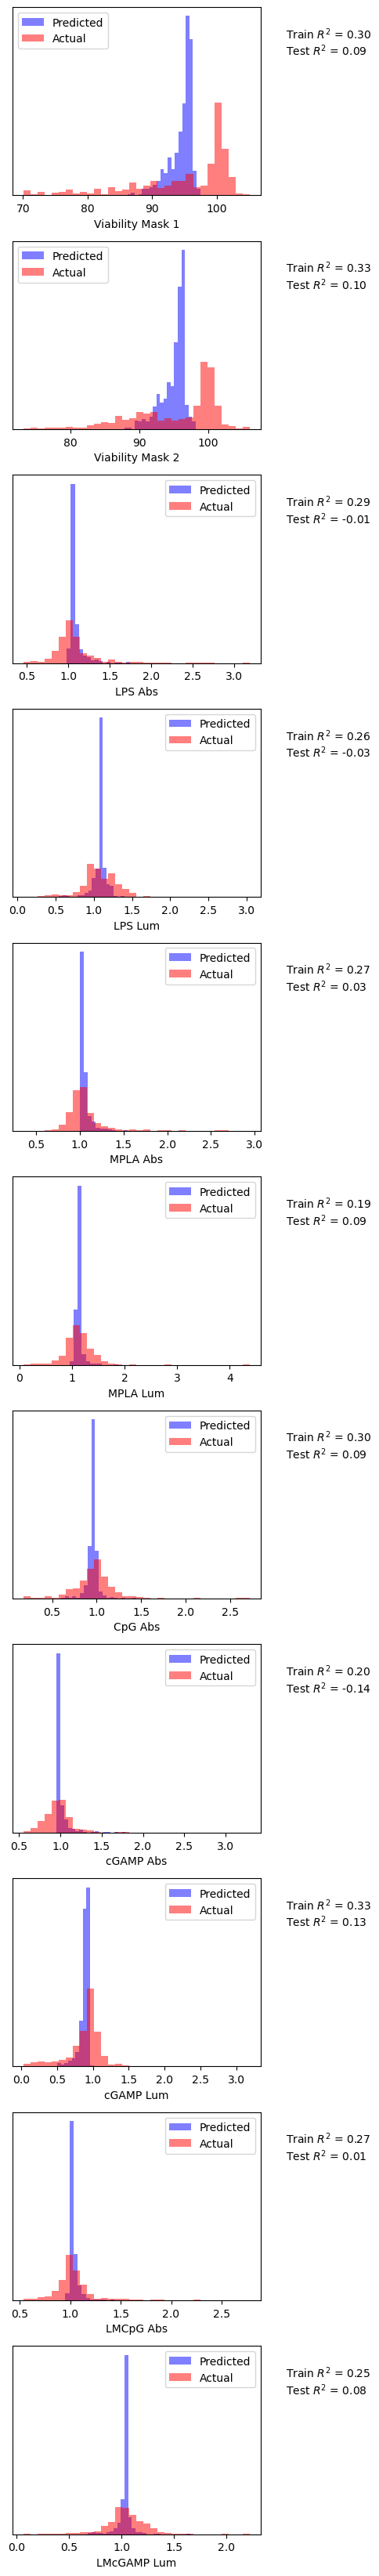

In [8]:
plot_regression_histograms(rfr_dict, train_X, test_X, test, train)